In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
import nlopt
from statsrat import expr
from exemplar_models import *
from spont_rec_time_cue import spont_rec
from plotnine import *

In [2]:
save_plots = True
model = null
print(model.pars)

par_vals = {'null': [2.0, 1.0, 5.0]}

            min   max  default
decay_rate  0.0  10.0      0.5
nu          0.0  10.0      0.0
resp_scale  0.0  10.0      1.0


In [3]:
# DO SIMULATIONS

ds_dict = {}
trials = spont_rec.make_trials('delay0')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
init_atn.loc[['ctx.time1.0', 'ctx.time1.0.cs'], 'time'] = 1.0
ds_dict[0] = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = spont_rec.make_trials('delayhalf')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
init_atn.loc[['ctx.time1.0', 'ctx.time1.0.cs'], 'time'] = 1.0
ds_dict[0.5] = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = spont_rec.make_trials('delay1')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
init_atn.loc[['ctx.time1.0', 'ctx.time1.0.cs'], 'time'] = 1.0
ds_dict[1] = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = spont_rec.make_trials('delay2')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
init_atn.loc[['ctx.time1.0', 'ctx.time1.0.cs'], 'time'] = 1.0
ds_dict[2] = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = spont_rec.make_trials('delay4')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = 1.0
init_atn.loc[['ctx.time1.0', 'ctx.time1.0.cs'], 'time'] = 1.0
ds_dict[4] = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

In [4]:
df = pd.DataFrame({'delay': [0, 0.5, 1, 2, 4], 'train_response': 5*[0], 'test_response': 5*[0]})
df = df.set_index('delay', drop = True)
for k in ds_dict.keys():
    index_train = (ds_dict[k]['stage_name'] == 'pre_ex_test') & (ds_dict[k]['t_name'] == 'main')
    df.loc[k, 'train_response'] = ds_dict[k]['b'].loc[{'t': index_train}].mean().values
    index_test = (ds_dict[k]['stage_name'] == 'test') & (ds_dict[k]['t_name'] == 'main')
    df.loc[k, 'test_response'] = ds_dict[k]['b'].loc[{'t': index_test}].mean().values
df = df.reset_index()
df['test_pct'] = 100*df['test_response']/df['train_response']
print(df)

   delay  train_response  test_response   test_pct
0    0.0        0.926993       0.667843  72.044019
1    0.5        0.926993       0.710626  76.659271
2    1.0        0.926993       0.809786  87.356178
3    2.0        0.926993       0.852628  91.977844
4    4.0        0.926993       0.851424  91.847910


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_spont_rec_b_null.jpeg


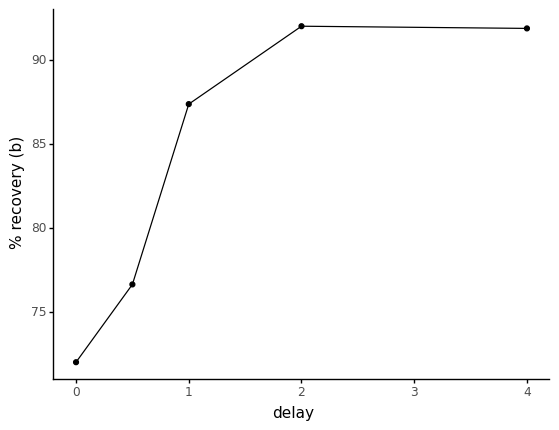

In [5]:
# Note that recovery can never truly reach 100%, because the CS -> US association
# has decreased at least a little.
plot_b = (ggplot(df, aes(x = 'delay', y = 'test_pct')) + geom_line() + geom_point())
plot_b += ylab('% recovery (b)')
plot_b += theme_classic()
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/exemplar_spont_rec_b_' + model.name + '.jpeg', dpi = 500)

In [6]:
#if model.name == 'grad_common':
#    sr.learn_plot(ds3, var = 'atn', color_var = 'x_name', sel = {'ex_name': ds3['ex_name'].values[0]}).draw()
#else:
#    sr.learn_plot(ds3, var = 'atn', color_var = 'x_name', facet_var = 'ex_name').draw()